In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
# reading a csv file using pandas library
wcat=pd.read_csv("wc-at.csv")
wcat.columns


Index(['Waist', 'AT'], dtype='object')

In [2]:
wcat

,Waist,AT
0,74.75,25.72
1,72.60,25.89
2,81.80,42.60
3,83.95,42.80
4,74.65,29.84
...,...,...
104,100.10,124.00
105,93.30,62.20
106,101.80,133.00
107,107.90,208.00


,Waist,AT
count,109.000000,109.000000
mean,91.901835,101.894037
std,13.559116,57.294763
min,63.500000,11.440000
25%,80.000000,50.880000
50%,90.800000,96.540000
75%,104.000000,137.000000
max,121.000000,253.000000


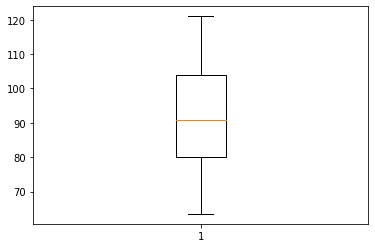

In [3]:
plt.boxplot(wcat.Waist)
wcat.describe()

In [4]:
wcat

,Waist,AT
0,74.75,25.72
1,72.60,25.89
2,81.80,42.60
3,83.95,42.80
4,74.65,29.84
...,...,...
104,100.10,124.00
105,93.30,62.20
106,101.80,133.00
107,107.90,208.00


(array([ 2.,  9., 19., 17., 11.,  9., 13., 21.,  5.,  3.]),
 array([ 63.5 ,  69.25,  75.  ,  80.75,  86.5 ,  92.25,  98.  , 103.75,
        109.5 , 115.25, 121.  ]),
 <BarContainer object of 10 artists>)

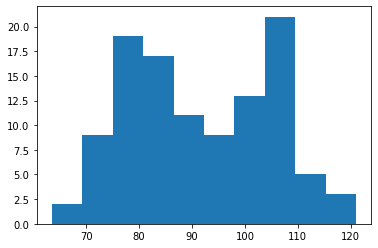

In [5]:
plt.hist(wcat.Waist)

{'whiskers': [<matplotlib.lines.Line2D at 0x1c8949ed850>,
 'caps': [<matplotlib.lines.Line2D at 0x1c893d9bcd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c8949edee0>],
 'medians': [<matplotlib.lines.Line2D at 0x1c893e2a2b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c893e2a610>],
 'means': []}

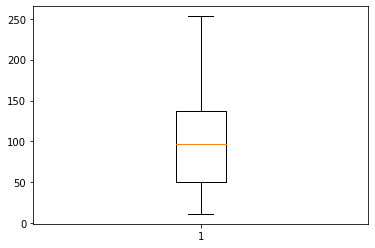

In [6]:
plt.boxplot(wcat.AT)

(array([14., 18., 16., 13., 17., 14.,  4.,  6.,  3.,  4.]),
 array([ 11.44 ,  35.596,  59.752,  83.908, 108.064, 132.22 , 156.376,
        180.532, 204.688, 228.844, 253.   ]),
 <BarContainer object of 10 artists>)

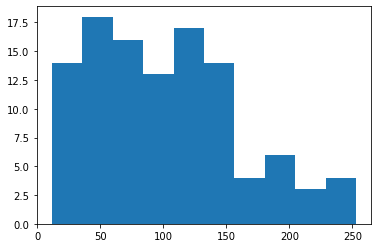

In [7]:
plt.hist(wcat.AT)

Help on function plot in module matplotlib.pyplot:

plot(*args, scalex=True, scaley=True, data=None, **kwargs)
    Plot y versus x as lines and/or markers.
    
    Call signatures::
    
        plot([x], y, [fmt], *, data=None, **kwargs)
        plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)
    
    The coordinates of the points or line nodes are given by *x*, *y*.
    
    The optional parameter *fmt* is a convenient way for defining basic
    formatting like color, marker and linestyle. It's a shortcut string
    notation described in the *Notes* section below.
    
    >>> plot(x, y)        # plot x and y using default line style and color
    >>> plot(x, y, 'bo')  # plot x and y using blue circle markers
    >>> plot(y)           # plot y using x as index array 0..N-1
    >>> plot(y, 'r+')     # ditto, but with red plusses
    
    You can use `.Line2D` properties as keyword arguments for more
    control on the appearance. Line properties and *fmt* can be mixed.
    The f

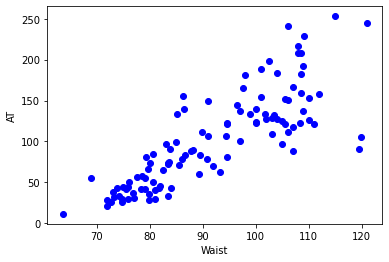

In [8]:
plt.plot(wcat.Waist,wcat.AT,"bo")
plt.xlabel("Waist")
plt.ylabel("AT")
help(plt.plot)

In [9]:
wcat.AT.corr(wcat.Waist)

0.8185578128958532

In [10]:
wcat.corr()

,Waist,AT
Waist,1.000000,0.818558
AT,0.818558,1.000000


In [11]:
#model-1
#simple linear model
import statsmodels.formula.api as smf
model=smf.ols("AT~Waist",data=wcat).fit()
model.params

Intercept   -215.981488
Waist          3.458859
dtype: float64

In [12]:
model.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     AT   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     217.3
Date:                Fri, 20 Aug 2021   Prob (F-statistic):           1.62e-27
Time:                        20:06:12   Log-Likelihood:                -534.99
No. Observations:                 109   AIC:                             1074.
Df Residuals:                     107   BIC:                             1079.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -215.9815     21.796     -9.909      0.000    -259.190    -172.773
Waist          3.4589      0.235     14.740      0.000       2.994       3.924
==============================================================================
Omnibus:                        3.960   Durbin-Watson:                   1.560
Prob(Omnibus):                  0.138   Jarque-Bera (JB):                4.596
Skew:                           0.104   Prob(JB):                        0.100
Kurtosis:                       3.984   Cond. No.                         639.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
pred=model.predict(wcat.iloc[ : ,0])
pred

0       42.568252
1       35.131704
2       66.953210
3       74.389758
4       42.222366
          ...    
104    130.250337
105    106.730093
106    136.130398
107    157.229440
108    159.304756
Length: 109, dtype: float64

In [14]:
model.resid 
#model.resid_pearso

0     -16.848252
1      -9.241704
2     -24.353210
3     -31.589758
4     -12.382366
         ...    
104    -6.250337
105   -44.530093
106    -3.130398
107    50.770560
108    48.695244
Length: 109, dtype: float64

In [15]:
print(model.conf_int(0.05))

                    0           1
Intercept -259.190053 -172.772923
Waist        2.993689    3.924030


In [16]:
pred = model.predict(wcat.iloc[:,0])
pred
pd.set_option("display.max_rows", 109) 
pred
rmse_lin = np.sqrt(np.mean((np.array(wcat['AT'])-np.array(pred))**2))
rmse_lin 

32.760177495755144

In [17]:
from ml_metrics import rmse
rmse(pred,wcat.AT)

32.760177495755144

Text(0, 0.5, 'TISSUE')

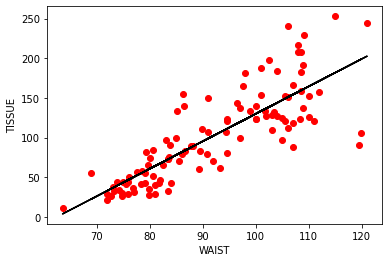

In [18]:
import matplotlib.pylab as plt
plt.scatter(x=wcat['Waist'],y=wcat['AT'],color='red')
plt.plot(wcat['Waist'],pred,color='black')
plt.xlabel('WAIST')
plt.ylabel('TISSUE')

In [19]:
#model-2
#log transformation model
model2 = smf.ols('AT~np.log(Waist)',data=wcat).fit()
model2.params
model2.resid 
model2.resid_pearson 


array([-0.43013734, -0.14277119, -0.78693898, -1.03169533, -0.29158069,
       -0.17072207, -1.09217203, -1.26753789,  0.71159098, -0.02935936,
        0.0249957 ,  0.09064127,  0.16648517, -0.453832  , -0.55712337,
        1.28132469, -0.03350272, -0.1177564 ,  0.23104721, -0.4683047 ,
       -0.3663138 , -0.75161482, -0.77830685, -1.09106674, -0.7117678 ,
       -1.07557488, -0.09283294,  0.63933201, -0.16463682, -0.19400747,
       -0.07238728, -0.0802131 , -0.68825537, -0.39746025, -0.34761146,
        0.20790802,  0.14597966, -0.38096686,  0.38615285, -0.05748072,
       -0.05500881,  0.16501712, -0.37959565,  1.64246669,  0.71680066,
       -1.09376091, -0.19844663,  0.26888514,  0.17552244,  0.6927808 ,
        0.39628543,  0.44691315,  1.57546435, -0.03336243, -0.40359241,
        0.07330998, -0.06125654,  2.12217705, -0.35582472, -0.01868772,
        0.16327227,  0.59521585, -0.99394743, -1.04905189, -3.00230059,
       -2.55120694,  0.7066452 , -0.85675711, -1.53858542,  0.37

In [20]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     AT   R-squared:                       0.675
Model:                            OLS   Adj. R-squared:                  0.672
Method:                 Least Squares   F-statistic:                     222.6
Date:                Fri, 20 Aug 2021   Prob (F-statistic):           6.80e-28
Time:                        20:09:27   Log-Likelihood:                -534.11
No. Observations:                 109   AIC:                             1072.
Df Residuals:                     107   BIC:                             1078.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1328.3420     95.923    -13.848      0.000   -1518.498   -1138.186
np.log(Waist)   317.1356     21.258     14.918      0.000     274.994     359.277
==============================================================================
Omnibus:                        3.317   Durbin-Watson:                   1.599
Prob(Omnibus):                  0.190   Jarque-Bera (JB):                2.908
Skew:                           0.235   Prob(JB):                        0.234
Kurtosis:                       3.647   Cond. No.                         145.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
pred2 = model2.predict(pd.DataFrame(wcat['Waist']))
pred2

0       39.828156
1       30.572779
2       68.410960
3       76.638769
4       39.403610
5       27.279545
6       64.902356
7       74.554213
8      -11.899606
9       33.182963
10      27.500161
11      40.887040
12      32.749422
13      57.365321
14      49.233194
15      13.753591
16      44.878862
17      37.272314
18      35.771839
19      44.670014
20      48.614795
21      64.902356
22      60.957833
23      95.876103
24      69.185406
25     105.677983
26      86.494845
27      63.330429
28      84.289954
29      71.113288
30      74.934244
31      91.940925
32     101.514217
33      96.586374
34     138.401374
35     114.180786
36     102.211986
37     141.495404
38      61.354500
39      57.365321
40      74.934244
41      45.087572
42      63.330429
43      86.128426
44      73.029520
45     153.874470
46     113.508888
47     114.180786
48      60.163006
49      58.567352
50      98.002160
51      76.071611
52      81.326049
53      42.994261
54      54.947503
55      55

In [22]:
rmse_log = np.sqrt(np.mean((np.array(wcat['AT'])-np.array(pred2))**2))
rmse_log 

32.49688490932126

In [23]:
pred2.corr(wcat.AT)

0.8217781862645356

Text(0, 0.5, 'TISSUE')

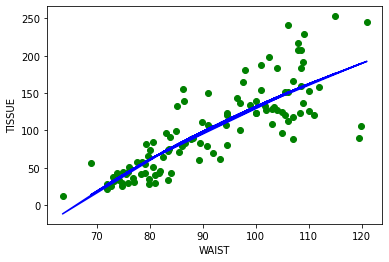

In [24]:
plt.scatter(x=wcat['Waist'],y=wcat['AT'],color='green')
plt.plot(wcat['Waist'],pred2,color='blue')
plt.xlabel('WAIST')
plt.ylabel('TISSUE')

In [25]:
#model-3
#exponential transformation
model3 = smf.ols('np.log(AT)~Waist',data=wcat).fit()
model3.params
model3.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             np.log(AT)   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     258.3
Date:                Fri, 20 Aug 2021   Prob (F-statistic):           2.68e-30
Time:                        20:11:07   Log-Likelihood:                -40.123
No. Observations:                 109   AIC:                             84.25
Df Residuals:                     107   BIC:                             89.63
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7410      0.233      3.185      0.002       0.280       1.202
Waist          0.0403      0.003     16.073      0.000       0.035       0.045
==============================================================================
Omnibus:                        2.604   Durbin-Watson:                   1.201
Prob(Omnibus):                  0.272   Jarque-Bera (JB):                2.117
Skew:                          -0.329   Prob(JB):                        0.347
Kurtosis:                       3.182   Cond. No.                         639.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
pred_log = model3.predict(pd.DataFrame(wcat['Waist']))

In [27]:
pred_log

0      3.749889
1      3.663346
2      4.033669
3      4.120211
4      3.745864
5      3.633157
6      3.997441
7      4.098072
8      3.297049
9      3.687498
10     3.635170
11     3.759952
12     3.683472
13     3.920962
14     3.840457
15     3.512400
16     3.798192
17     3.725738
18     3.711649
19     3.796179
20     3.834419
21     3.997441
22     3.957189
23     4.331536
24     4.041719
25     4.444243
26     4.226880
27     3.981340
28     4.202729
29     4.061845
30     4.102098
31     4.287259
32     4.395940
33     4.339587
34     4.846767
35     4.544874
36     4.403991
37     4.887020
38     3.961214
39     3.920962
40     4.102098
41     3.800204
42     3.981340
43     4.222855
44     4.081971
45     5.052055
46     4.536824
47     4.544874
48     3.949138
49     3.933037
50     4.355688
51     4.114173
52     4.170527
53     3.780078
54     3.896810
55     3.904861
56     4.275183
57     4.214804
58     4.182602
59     4.110148
60     3.864608
61     4.158451
62     3

In [28]:
pred3=np.exp(pred_log)  # as we have used log(AT) in preparing model so we need to convert it back
pred3

0       42.516361
1       38.991601
2       56.467684
3       61.572246
4       42.345566
5       37.832062
6       54.458630
7       60.224086
8       27.032754
9       39.944768
10      37.908280
11      42.946367
12      39.784304
13      50.448940
14      46.546737
15      33.528629
16      44.620431
17      41.501829
18      40.921236
19      44.530718
20      46.266541
21      54.458630
22      52.310071
23      76.061058
24      56.924111
25      85.135421
26      68.503177
27      53.588815
28      66.868544
29      58.081384
30      60.466992
31      72.766723
32      81.120871
33      76.675857
34     127.328119
35      94.148585
36      81.776569
37     132.557934
38      52.521056
39      50.448940
40      60.466992
41      44.710326
42      53.588815
43      68.227989
44      59.262185
45     156.343375
46      93.393686
47      94.148585
48      51.890640
49      51.061841
50      77.920405
51      61.201601
52      64.749549
53      43.819471
54      49.245120
55      49

In [29]:
rmse_exp = np.sqrt(np.mean((np.array(wcat['AT'])-np.array(pred3))**2))
rmse_exp 

38.529001758071445

In [30]:
pred3.corr(wcat.AT)

0.7633804583650527

Text(0, 0.5, 'TISSUE')

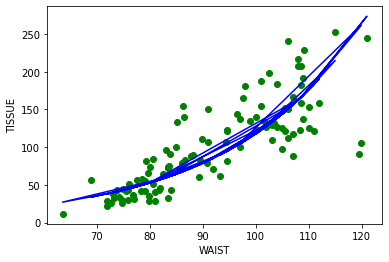

In [31]:
plt.scatter(x=wcat['Waist'],y=wcat['AT'],color='green')
plt.plot(wcat.Waist,pred3,color='blue')
plt.xlabel('WAIST')
plt.ylabel('TISSUE')


In [27]:
student_resid = model3.resid_pearson 
student_resid

array([-1.42426841, -1.16036536, -0.79857367, -1.03053611, -0.99183029,
       -1.57770329, -1.77782943, -1.7063649 , -2.43678253, -0.60898882,
       -0.82630708,  0.05965107, -0.11441073, -0.48719133, -1.15546702,
        1.44239166, -0.05388192, -0.61457662,  0.16338349, -1.18519137,
       -0.66413371, -0.85671265, -1.10408983, -0.66788034, -0.61366891,
       -0.53854217,  0.559278  ,  1.28377825,  0.46848176,  0.30798929,
        0.51662718,  0.58049434, -0.07722426,  0.24329581, -0.00731172,
        0.71101855,  0.76180321, -0.07709724,  0.97229834,  0.26937281,
        0.53880043,  0.34505495, -0.14698466,  2.03681962,  1.38280011,
       -0.79731502,  0.38539598,  0.75747349,  0.67811133,  1.31762395,
        1.00267879,  1.11566466,  2.03975207, -0.12692781, -0.4705888 ,
        0.44867784,  0.60008028,  2.34805258,  0.21771996,  0.59055788,
        0.50813615,  1.25820146, -1.76365553, -0.81659309, -2.97779536,
       -2.56121918,  0.97601914, -0.5436722 , -1.10931613,  0.18

Text(0, 0.5, 'Standardized Residual')

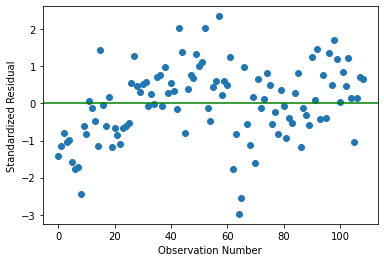

In [33]:
plt.plot(model3.resid_pearson,'o')
plt.axhline(y=0,color='green')
plt.xlabel("Observation Number")
plt.ylabel("Standardized Residual")

Text(0, 0.5, 'Actual')

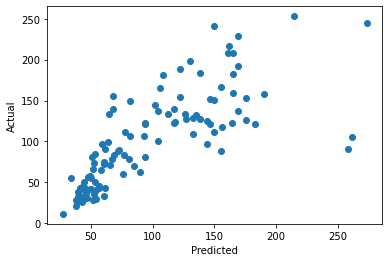

In [34]:
plt.scatter(x=pred3,y=wcat.AT)
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [32]:
#add a new column to the data set
wcat["Waist_Sq"] = wcat.Waist*wcat.Waist
wcat 

,Waist,AT,Waist_Sq
0,74.75,25.72,5587.5625
1,72.60,25.89,5270.7600
2,81.80,42.60,6691.2400
3,83.95,42.80,7047.6025
4,74.65,29.84,5572.6225
5,71.85,21.68,5162.4225
6,80.90,29.08,6544.8100
7,83.40,32.98,6955.5600
8,63.50,11.44,4032.2500
9,73.20,32.22,5358.2400


In [33]:
#model-4
#quadratic model
model_quad = smf.ols("np.log(AT)~Waist+Waist_Sq",data=wcat).fit()
model_quad.params

Intercept   -7.824071
Waist        0.228864
Waist_Sq    -0.001016
dtype: float64

In [34]:
model_quad.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             np.log(AT)   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     186.8
Date:                Fri, 20 Aug 2021   Prob (F-statistic):           1.80e-35
Time:                        20:12:49   Log-Likelihood:                -24.779
No. Observations:                 109   AIC:                             55.56
Df Residuals:                     106   BIC:                             63.63
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -7.8241      1.473     -5.312      0.000     -10.744      -4.904
Waist          0.2289      0.032      7.107      0.000       0.165       0.293
Waist_Sq      -0.0010      0.000     -5.871      0.000      -0.001      -0.001
==============================================================================
Omnibus:                        0.325   Durbin-Watson:                   1.464
Prob(Omnibus):                  0.850   Jarque-Bera (JB):                0.271
Skew:                           0.119   Prob(JB):                        0.873
Kurtosis:                       2.949   Cond. No.                     4.49e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.49e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [35]:
pred_quad = model_quad.predict(wcat)
pred4=np.exp(pred_quad)  # as we have used log(AT) in preparing model so we need to convert it back
pred4
rmse_quad = np.sqrt(np.mean((np.array(wcat['AT'])-np.array(pred4))**2))
rmse_quad 

32.244447827762485

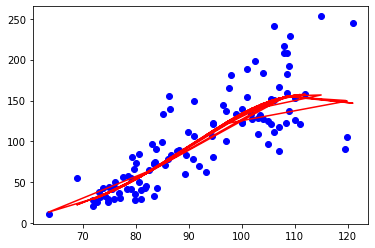

In [36]:
plt.scatter(wcat.Waist,wcat.AT,c="b")
plt.plot(wcat.Waist,pred4,"r")

Text(0, 0.5, 'Standardized Residual')

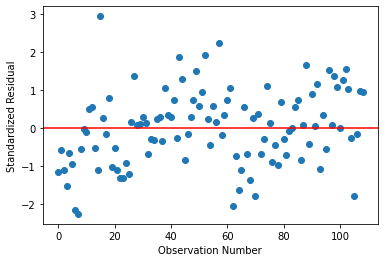

In [37]:
plt.scatter(np.arange(109),model_quad.resid_pearson)
plt.axhline(y=0,color='red')
plt.xlabel("Observation Number")
plt.ylabel("Standardized Residual")

(array([ 5.,  5., 16., 19., 27., 15., 14.,  5.,  2.,  1.]),
 array([-2.26761195, -1.74678239, -1.22595282, -0.70512326, -0.1842937 ,
         0.33653586,  0.85736542,  1.37819499,  1.89902455,  2.41985411,
         2.94068367]),
 <BarContainer object of 10 artists>)

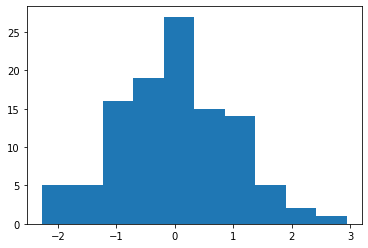

In [38]:
plt.hist(model_quad.resid_pearson)

In [39]:
data = {"MODEL":pd.Series(["rmse_lin","rmse_log","rmse_exp","rmse_quad"]),
        "RMSE_Values":pd.Series([rmse_lin,rmse_log,rmse_exp,rmse_quad]),
        "Rsquare":pd.Series([model.rsquared,model2.rsquared,model3.rsquared,model_quad.rsquared])}
table=pd.DataFrame(data)
table

,MODEL,RMSE_Values,Rsquare
0,rmse_lin,32.760177,0.670037
1,rmse_log,32.496885,0.675319
2,rmse_exp,38.529002,0.707114
3,rmse_quad,32.244448,0.778982


In [40]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [84]:
import matplotlib.pyplot as plt
>>> plt.style.use('classic')

(array([ 5.,  5., 16., 19., 27., 15., 14.,  5.,  2.,  1.]),
 array([-2.26761195, -1.74678239, -1.22595282, -0.70512326, -0.1842937 ,
         0.33653586,  0.85736542,  1.37819499,  1.89902455,  2.41985411,
         2.94068367]),
 <a list of 10 Patch objects>)

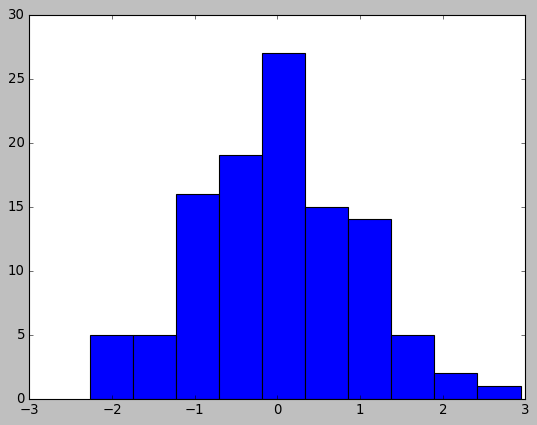

In [85]:
plt.hist(model_quad.resid_pearson)

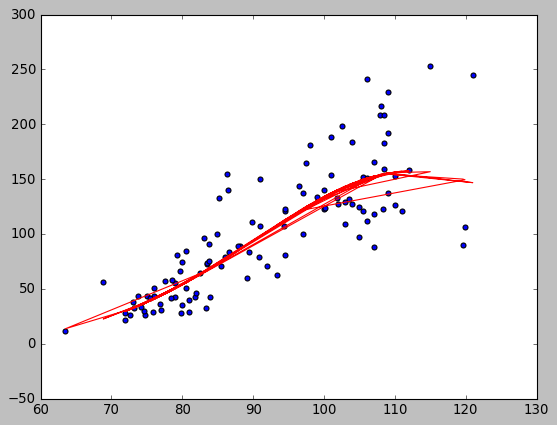

In [86]:
plt.scatter(wcat.Waist,wcat.AT,c="b")
plt.plot(wcat.Waist,pred4,"r")